In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import shutil
import math
import os
from tqdm import tqdm
import numpy as np 
import pandas as pd
import os
import scipy.ndimage
import nibabel as nib
import matplotlib.pyplot as plt
from numpy.random import rand
from skimage import measure, morphology
from scipy.ndimage import zoom
import cv2
import tensorflow as tf

%matplotlib inline

**Resizing Image**

In [11]:

width = 256
height = 256
def resize_image(img , width, height):
    img_sm = np.zeros((len(img), width, height))
    for i in range(len(img)):
        idx = img[i, :, :]
        idx_sm = cv2.resize(idx, (width, height), interpolation=cv2.INTER_AREA)
        img_sm[i, :, :] = idx_sm
        
    return img_sm

In [12]:
for i in range(0,210): 
  cid = f'{i:05}'
  data_path = f"/content/drive/MyDrive/Colab Notebooks/Kidney Tumor segmentation/data/case_{cid}/"
      
  img_file = os.path.join(data_path, 'imaging.nii.gz')        
  seg_file = os.path.join(data_path, 'segmentation.nii.gz')     
  image = nib.load(img_file)
  segmentation = nib.load(seg_file)
  img = image.get_fdata()
  seg = segmentation.get_fdata()
  new_image = resize_image(img , width, height)
  new_seg = resize_image(seg , width, height)
  path = f"/content/drive/MyDrive/Colab Notebooks/Kidney Tumor segmentation/data_resized/case_{cid}/"
  ni_img = nib.Nifti1Image(new_image, image.affine)
  ni_seg = nib.Nifti1Image(new_seg, segmentation.affine)
  if not os.path.exists(path): 
            os.makedirs(path)
  nib.save(ni_img, path + 'imaging.nii.gz')
  nib.save(ni_seg, path + 'segmentation.nii.gz')

**Extra Blocks**

In [ ]:
np.clip(image, self.min, self.max)

In [ ]:
from starter_code.visualize import visualize
def Visual_original(cid):
    case = f'case_{cid:05}'
    dest = os.path.join('Visualize/', f'{case}')
    visualize(case, dest)
Visual_original(15)

In [ ]:
new_image.shape

(75, 512, 512)

In [ ]:
path = f"data_resized/case_{cid}/"
ni_img = nib.Nifti1Image(new_image, image.affine)
ni_seg = nib.Nifti1Image(new_seg, segmentation.affine)
if not os.path.exists(path): 
            os.makedirs(path)
nib.save(ni_img, path + 'imaging.nii.gz')
nib.save(ni_seg, path + 'segmentation.nii.gz')

In [ ]:
from my_files.visualize import visualize
def Visual_resized(cid):
    case = f'case_{cid:05}'
    dest = os.path.join('Visualize/', f'resized_{case}')
    visualize(case, dest)
Visual_resized(15)

/media/rami/New Volume/kits19/data_resized
/media/rami/New Volume/kits19/data_resized


Text(0.5, 1.0, 'After')

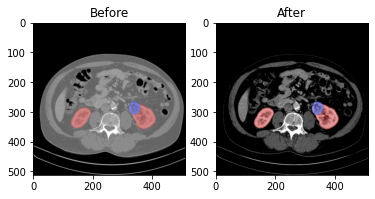

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
img = plt.imread('Visualize/case_00015/00058.png')
imgplot = plt.imshow(img)
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
img = plt.imread('Visualize/resized_case_00015/00058.png')

imgplot = plt.imshow(img)
ax.set_title('After')


In [ ]:
def hu_to_grayscale(volume, hu_min, hu_max):
    # Clip at max and min values if specified
    if hu_min is not None or hu_max is not None:
        volume = np.clip(volume, hu_min, hu_max)

    # Scale to values between 0 and 1
    mxval = np.max(volume)
    mnval = np.min(volume)
    im_volume = (volume - mnval)/max(mxval - mnval, 1e-3)

    # Return values scaled to 0-255 range, but *not cast to uint8*
    # Repeat three times to make compatible with color overlay
    im_volume = 255*im_volume
    return np.stack((im_volume, im_volume, im_volume), axis=-1)

In [ ]:
import scipy.misc
cid = f'{15:05}'
data_path = f"data/case_{cid}/"
all_images = os.path.join(data_path, 'imaging.nii.gz')        
data_path = f"data_resized/case_{cid}/"
all_masks = os.path.join(data_path, 'imaging.nii.gz')


test_image=nib.load(all_images)
spacing = test_image.affine
test_image = test_image.get_fdata()
vol_ims = hu_to_grayscale(test_image, -512, 512)

spc_ratio = np.abs(np.sum(spacing[2,:]))/np.abs(np.sum(spacing[0,:]))
for i in range(vol_ims.shape[1]):
            vol_im = scipy.misc.imresize(
                vol_ims[:,i,:], (
                    int(vol_ims.shape[0]*spc_ratio),
                    int(vol_ims.shape[2])
                ), interp="bicubic"
            )
            seg_im = scipy.misc.imresize(
                seg_ims[:,i,:], (
                    int(vol_ims.shape[0]*spc_ratio),
                    int(vol_ims.shape[2])
                ), interp="nearest"
            )
            sim = scipy.misc.imresize(
                seg[:,i,:], (
                    int(vol_ims.shape[0]*spc_ratio),
                    int(vol_ims.shape[2])
                ), interp="nearest"
            )



test_mask=nib.load(all_masks).get_fdata()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(vol_ims[58], cmap='gray')
ax1.set_title('Image')
ax2.imshow(test_mask[58], cmap='gray')
ax2.set_title('Mask')

AttributeError: module 'scipy.misc' has no attribute 'imresize'

In [ ]:
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

In [ ]:
w, h = 256, 256
def rs_img(img):
    '''W and H is 128 now
    '''
    img_sm = np.zeros((len(img), w, h))
    #img = np.transpose(img)
    #flatten = [cv2.resize(img[i,:,:], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[0])]
    for i in range(len(img)):
        idx = img[i, :, :]
        idx_sm = cv2.resize(idx, (w, h), interpolation=cv2.INTER_AREA)
        img_sm[i, :, :] = idx_sm
    
    #img = np.array(np.dstack(flatten)) 
    return img_sm

In [ ]:
for i in range(210,300): 
    cid = f'{i:05}'
    data_path = f"data/case_{cid}/"
    
    img_file = os.path.join(data_path, 'imaging.nii.gz')        
    #seg_file = os.path.join(data_path, 'segmentation.nii.gz')     
    image = nib.load(img_file)
    #segmentation = nib.load(seg_file)
    img = image.get_fdata()
    #seg = segmentation.get_fdata()
    new_image = rs_img(img)
    #new_seg = rs_img(seg)
    path = f"data_resized/case_{cid}/"
    ni_img = nib.Nifti1Image(new_image, image.affine)
    #ni_seg = nib.Nifti1Image(new_seg, segmentation.affine)
    if not os.path.exists(path): 
            os.makedirs(path)
    nib.save(ni_img, path + 'imaging.nii.gz')
    #nib.save(ni_seg, path + 'segmentation.nii.gz')

In [ ]:
    cid = f'{15:05}'
    data_path = f"data_resized/case_{cid}/"
    
    img_file = os.path.join(data_path, 'imaging.nii.gz')        
    seg_file = os.path.join(data_path, 'segmentation.nii.gz')     
    image = nib.load(img_file)
    segmentation = nib.load(seg_file)
    img = image.get_fdata()
    seg = segmentation.get_fdata()
    img.shape

(75, 256, 256)